In [263]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import matplotlib.pyplot as plt

In [240]:
df = pd.read_csv('realtor-data.csv')

In [241]:
status = pd.get_dummies(df['status'], prefix='status')

In [242]:
df = pd.concat([df, status], axis = 1)

In [243]:
df.drop('status', axis=1, inplace=True)

In [244]:
df.drop('prev_sold_date', axis=1, inplace=True)

In [245]:
cities = pd.get_dummies(df['city'], prefix='city')

In [246]:
df = pd.concat([df, cities], axis = 1)

In [247]:
df.drop('city', axis=1, inplace=True)

In [248]:
states = pd.get_dummies(df['state'], prefix='state')

In [249]:
df = pd.concat([df, states], axis = 1)

In [250]:
df.drop('state', axis=1, inplace=True)

In [251]:
df.dropna(axis=0, inplace=True)

In [252]:
df = df.astype(int)

In [253]:
y = df['price']

In [254]:
X = df.drop('price', axis=1)

In [255]:
X

,bed,bath,acre_lot,zip_code,house_size,status_for_sale,city_Adjuntas,city_Aguada,city_Aguadilla,city_Aguas Buenas,...,city_Trujillo Alto,city_Utuado,city_Vega Alta,city_Vega Baja,city_Vieques,city_Villalba,city_Yabucoa,city_Yauco,state_Puerto Rico,state_Virgin Islands
0,3,2,0,601,920,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4,2,0,601,1527,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1,0,795,748,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,2,0,731,1800,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,4,3,0,612,2520,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24209,5,3,1,987,3872,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24214,3,2,0,987,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24215,3,3,0,987,1550,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24216,3,1,0,987,880,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [256]:
y

0        105000
1         80000
2         67000
3        145000
5        179000
          ...  
24209    275000
24214     95000
24215    299000
24216     93000
24223    180000
Name: price, Length: 13945, dtype: int32

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1111, shuffle=True)

In [258]:
param_dist = {
    'n_neighbors' : randint(1,20),
    'weights': ['uniform','distance'],
    'p': [1, 2] 
}

In [261]:
random_search = RandomizedSearchCV(
    knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=1111
)

In [267]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=KNeighborsRegressor(n_jobs=-1, n_neighbors=15, p=1,
                                                 weights='distance'),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019E4855C730>,
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=1111, scoring='neg_mean_squared_error')

In [273]:
best =  random_search.best_params_
knn = random_search.best_estimator_

In [277]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=14, p=1, weights='distance')

In [278]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [279]:
knn_test_score = knn.score(X_test, y_test)
knn_train_score = knn.score(X_train, y_train)
knn_mae = mean_absolute_error(y_test, y_test_pred)
knn_mse = mean_squared_error(y_test, y_test_pred)

In [280]:
print("Train score: ",knn_train_score)
print("Test score: ",knn_test_score)


Train score:  0.9997345443716207
Test score:  0.7994243949387925


In [281]:
param_dist_lr = {
    'fit_intercept': [True, False],
    'n_jobs': [-1, 1, 2],
    'copy_X':[True, False]
}
random_search_lr = RandomizedSearchCV(
    estimator=LinearRegression(), param_distributions=param_dist_lr, n_iter=10, cv=5, random_state=1111
)
random_search_lr.fit(X_train, y_train)
lr = random_search_lr.best_estimator_

In [282]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept= False, copy_X = False, n_jobs= -1 )
lr.fit(X_train, y_train)

# Predicting the Test set results
y_test_pred_lr = lr.predict(X_test)
y_train_pred_lr = lr.predict(X_train)

In [283]:
lr_test_score = lr.score(X_test, y_test)
lr_train_score = lr.score(X_train, y_train)
lr_mae = mean_absolute_error(y_test, y_test_pred_lr)
lr_mse = mean_squared_error(y_test, y_test_pred_lr)
print("Train score: ",lr_train_score)
print("Test score: ",lr_test_score)

Train score:  0.38440648534382316
Test score:  0.39845291872465727


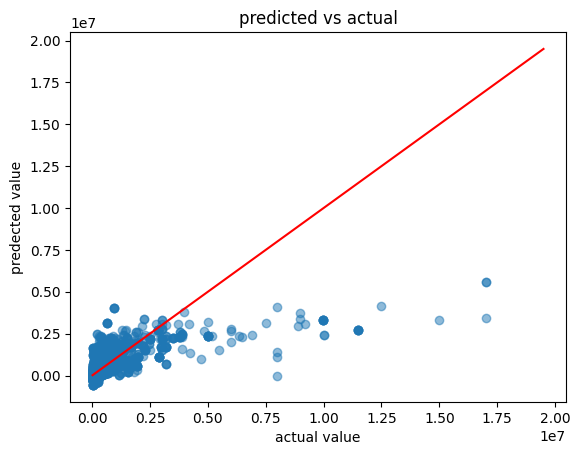

In [284]:
#Linear regression
plt.scatter(y_test,y_test_pred_lr,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()],color='red')
plt.xlabel("actual value")
plt.ylabel("predected value")
plt.title("predicted vs actual")
plt.show()

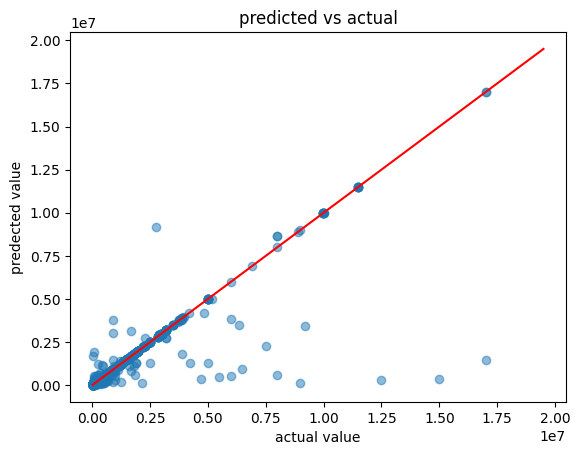

In [285]:
#KNN
plt.scatter(y_test,y_test_pred,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()],color='red')
plt.xlabel("actual value")
plt.ylabel("predected value")
plt.title("predicted vs actual")
plt.show()